In [1]:
import pandas as pd
import numpy as np
import networkx as nx

from matplotlib import pyplot as plt

import sys
sys.path.append('../.')
from comap.mapper import CoMap
#from comap.graph_utils import (compute_graph_deltas)
#from comap.helper_utils import (get_reduced_categories)

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
input_excel = '../data/Deltakerkart_30barrierer.xlsx'


In [3]:
# read maps
df_maps = pd.read_excel(input_excel,index_col=0, sheet_name=None)
listOfStr = df_maps['NyDeltaker'].index
#node_labels = { i : listOfStr[i] for i in range(0, len(listOfStr) ) }
node_labels = { listOfStr[i] : listOfStr[i] for i in range(0, len(listOfStr))  }
#node_labels

In [4]:
# create maps from adjacency matrices

maps = []

for i, (key, value) in enumerate(df_maps.items()):
    
    # create graph
    g_i = nx.from_pandas_adjacency(value, create_using=nx.DiGraph)
    # check if map is connected, else select largest connected component
    if nx.is_connected(g_i.to_undirected()):
         # push back
        print(i, key, len(value), " appending graph size:", len(g_i))
        maps.append( g_i )
    
    else:
        # connected components
        cc = [len(c) for c in sorted(nx.connected_components(g_i.to_undirected()), key=len, reverse=True)]
        print("Found multiple connected components:", cc)
        # select largest connected component
        if(cc[0]>1):
            g_i = max(nx.connected_component_subgraphs(g_i.to_undirected()), key=len)
            # push back
            print(i, key, len(value), " appending graph size:", len(g_i))
            maps.append( g_i )
    
print(len(maps))

Found multiple connected components: [13, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0 Rune 29  appending graph size: 13
Found multiple connected components: [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1 Jeanette Jansen 29  appending graph size: 2
Found multiple connected components: [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
2 Lise Charlotte Tviberg 29  appending graph size: 10
Found multiple connected components: [15, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
3 Mari T 29  appending graph size: 15
Found multiple connected components: [9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
4 Linda  29  appending graph size: 9
Found multiple connected components: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Found multiple connected components: [16, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
6 Per-Christian Nielsen 29  appending graph size: 16
Found multiple connected component

In [5]:
G_agg = CoMap(name='Agg_DesignMock')
#deltas = compute_graph_deltas( maps )
G_agg.aggregate_maps(maps,node_labels)
#G_agg.set_deltas(deltas)
#nx.draw_circular(G_agg.map, node_color=G_agg.node_colors.values(), with_labels=True)

In [6]:
G_agg.map.nodes()

NodeView(('Har ikke fine klær', 'Introvert', 'Dårlig råd', 'Ikke funnet en man liker', 'Har ikke kjæreste', 'Viktig å priortere venner', 'Høye forventninger', 'Sjenert', 'Lite nettverk', 'Gode kandidater er tatt', 'Kan ikke flørte', 'Liker ikke å gå på byen', 'Vanskelig å etablere kontakt', 'Langt å reise for å treffe folk', 'Travel/ lite tid', 'Høyt krav til samfunnsengasjement', 'Høyt aktivitetsnivå', '"Alltid" på reise', 'Dyrt å spandere', 'Arbeidsledig', 'Slitsomt å søke jobber', 'Mye gaming', 'Spiller på kvelden/ natten', 'Tungvint å komme frem', 'Engstelig for diskriminering'))

## Aggregert kart

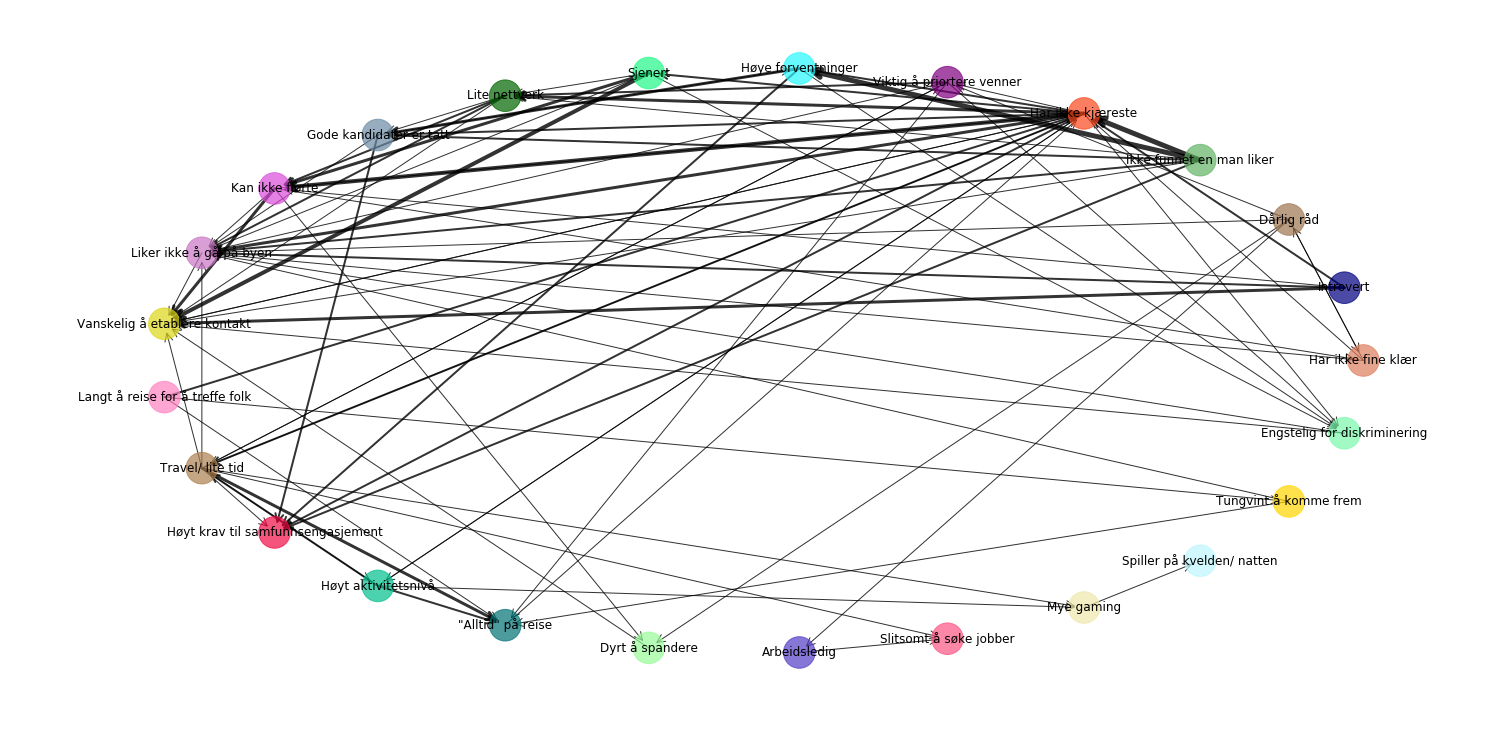

In [18]:
G_agg.plot_map(layout='shell')

## Sentrale faktorer

In [11]:
G_agg.map_properties(sort_by=['Pagerank']).head(10)

,Node_degree,Out_degree,Out_degree_wg,In_degree,In_degree_wg,Pagerank,Eigenvector_centrality,Degree_centrality,Closeness_centrality,Betweenness_centrality
Sjenert,23,13,25,10,16,0.205004,0.423513,0.958333,0.485215,0.279112
Tungvint å komme frem,11,1,1,10,17,0.160409,0.475347,0.458333,0.537202,0.073913
Høyt krav til samfunnsengasjement,14,1,1,13,18,0.091471,0.455147,0.583333,0.578526,0.182619
Kan ikke flørte,5,0,0,5,9,0.055483,0.254974,0.208333,0.406504,0.013929
Langt å reise for å treffe folk,9,5,7,4,10,0.055159,0.186100,0.375000,0.349806,0.025211
Viktig å priortere venner,7,3,4,4,8,0.044547,0.199611,0.291667,0.385684,0.006786
Høyt aktivitetsnivå,8,4,6,4,7,0.038727,0.181616,0.333333,0.358135,0.011292
Lite nettverk,6,3,6,3,8,0.034985,0.162116,0.250000,0.358135,0.003925
Har ikke fine klær,6,1,1,5,8,0.031855,0.135297,0.250000,0.278549,0.031177
Mye gaming,12,9,11,3,5,0.031642,0.194801,0.500000,0.334259,0.223416


In [12]:
G_agg.get_n_highest_ranking_nodes(n=5)

Rank,Node_degree,Out_degree,Out_degree_wg,In_degree,In_degree_wg,Pagerank,Eigenvector_centrality,Degree_centrality,Closeness_centrality,Betweenness_centrality
1,Sjenert,Sjenert,Sjenert,Høyt krav til samfunnsengasjement,Høyt krav til samfunnsengasjement,Sjenert,Tungvint å komme frem,Sjenert,Høyt krav til samfunnsengasjement,Sjenert
2,Høyt krav til samfunnsengasjement,Mye gaming,Liker ikke å gå på byen,Sjenert,Tungvint å komme frem,Tungvint å komme frem,Høyt krav til samfunnsengasjement,Høyt krav til samfunnsengasjement,Tungvint å komme frem,Mye gaming
3,Mye gaming,Liker ikke å gå på byen,Mye gaming,Tungvint å komme frem,Sjenert,Høyt krav til samfunnsengasjement,Sjenert,Mye gaming,Sjenert,Høyt krav til samfunnsengasjement
4,Tungvint å komme frem,Langt å reise for å treffe folk,Dyrt å spandere,Kan ikke flørte,Langt å reise for å treffe folk,Kan ikke flørte,Kan ikke flørte,Tungvint å komme frem,Kan ikke flørte,"""Alltid"" på reise"
5,Langt å reise for å treffe folk,Dyrt å spandere,Vanskelig å etablere kontakt,Har ikke fine klær,Kan ikke flørte,Langt å reise for å treffe folk,Har ikke kjæreste,Langt å reise for å treffe folk,Har ikke kjæreste,Tungvint å komme frem


/Users/rprabhu/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
/Users/rprabhu/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Courier'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


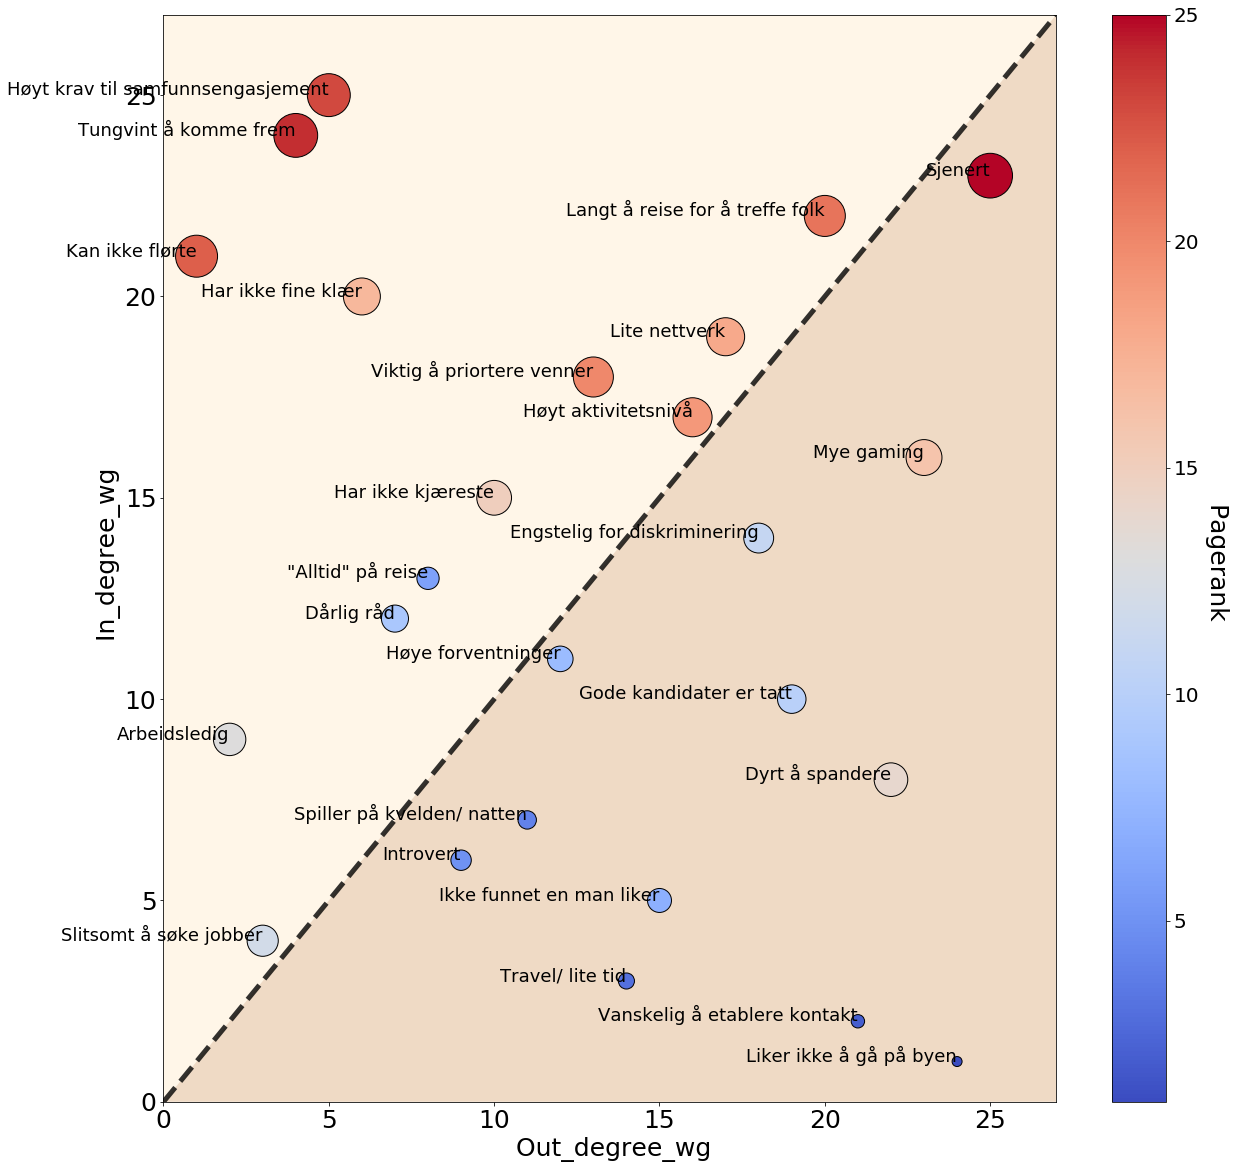

In [13]:
G_agg.plot_quadrant_scatter()

## Ego kart

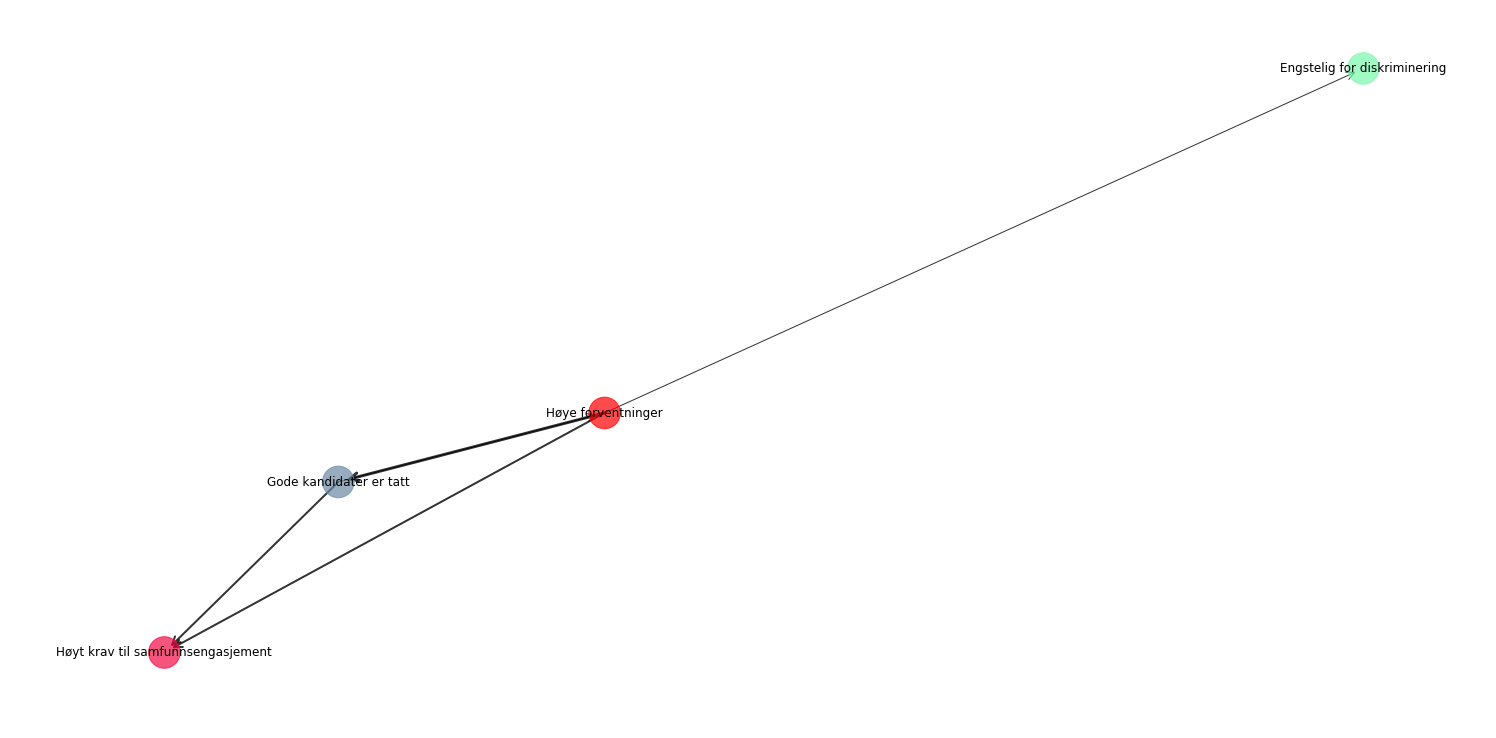

In [24]:
G_agg.plot_ego_map('Høye forventninger', direction='outgoing',layout='spring')